import os 
import PIL
import torch
import pandas
import torchvision 
import matplotlib.pyplot as plt

# 数据集路径
train_path = './train'
test_path = './test'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [20]:
import os
import PIL
import torch
import pandas
import torchvision
import matplotlib.pyplot as plt
from torch.utils.data import Dataset

train_path = './train'
test_path = './test'
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [22]:
# class MyDataset(torch.utils.data.Dataset):
#     def __init__(self, data_path:str, train=True, transform=None):
#         self.data_path = data_path
#         self.train_flag = train
#         if transform is None:
#             self.transform = torchvision.transforms.Compose(
#             [
#                 torchvision.transforms.Resize(size = (224,224)),       #尺寸规范
#                 torchvision.transforms.ToTensor(),                     #转化为tensor
#                 torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)), # 归一化
#             ])
#         else:
#             self.transform = transform
#         self.path_list = os.listdir(data_path) # 列出所有图片命名
#     def __getitem__(self, idx: int):
        
#         img_path = self.path_list[idx]
#         if self.train_flag is True:
#             # 例如 img_path 值 cat.10844.jpg -> label = 0
#             if img_path.split('.')[0] == 'dog' : 
#                 label = 1
#             else:
#                 label = 0
#         else:
#             label = int(img_path.split('.')[0])          # 获取test数据的编号
#         label = torch.tensor(label, dtype=torch.int64)   # 把标签转换成int64
#         img_path = os.path.join(self.data_path, img_path)# 合成图片路径
#         img = PIL.Image.open(img_path)   # 读取图片
#         img = self.transform(img)        # 把图片转换成tensor
#         return img, label
#     def __len__(self) -> int:
#         return len(self.path_list)       # 返回图片数量

class MyDataset(Dataset):
    def __init__(self, dataset_path, train=True, transformer=None):
        self.img_path = dataset_path
        self.train = train
        if transformer is None:
            self.transform = torchvision.transforms.Compose(
                [
                    torchvision.transforms.Resize((224, 224)),
                    torchvision.transforms.ToTensor(),
                    torchvision.transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5)),
                ]
            )
        else:
            self.transform = transformer
        self.img_list = os.listdir(dataset_path)
    def __getitem__(self, index):
        img_path = self.img_list[index]
        if self.train:
            if img_path.split('.')[0] == 'dog':
                label = 1
            else:
                label = 0
        else:
            label = int(img_path.split('.')[0])
        label = torch.tensor(label, dtype=torch.int64)
        img_p = os.path.join(self.img_path, img_path)
        img = PIL.Image.open(img_p)
        img = self.transform(img)
        return img, label
    def __len__(self) -> int:
        return len(self.img_list)
    
train_datas = MyDataset(train_path)
test_datas = MyDataset(test_path,train=False)
print(train_datas)

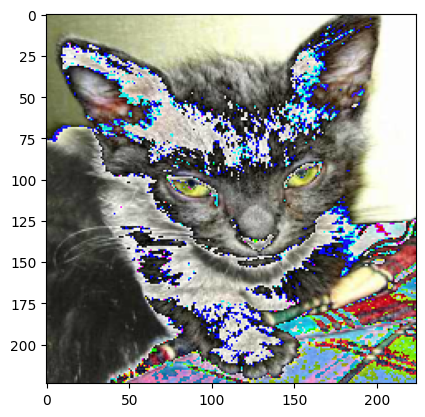

In [24]:
Img_PIL_Tensor = train_datas[21][0]      
new_img_PIL = torchvision.transforms.ToPILImage()(Img_PIL_Tensor).convert('RGB')
plt.imshow(new_img_PIL)
plt.show()

In [4]:
train_size = int(0.7 * len(train_datas))
validate_size = len(train_datas) - train_size
train_datas,validate_datas = torch.utils.data.random_split(train_datas,[train_size, validate_size])
#train_test_split(train_datas[:][0],train_datas[:][1], test_size=0.2)

In [25]:
train_loader = torch.utils.data.DataLoader(train_datas, batch_size=32,
                                            shuffle=True, pin_memory=True, num_workers=0)
validate_loader = torch.utils.data.DataLoader(validate_datas, batch_size=32,
                                            shuffle=True, pin_memory=True, num_workers=0)
test_loader = torch.utils.data.DataLoader(test_datas, batch_size=32,
                                            shuffle=False, pin_memory=True, num_workers=0)

In [30]:
from torchvision import datasets, models, transforms
model = models.resnet50(pretrained=True)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [39]:
Use_gpu = torch.cuda.is_available()
for param in model.parameters():
    param.requires_grad = False

'''重写model的classifier属性，重新设计分类器的结构'''
model.fc = torch.nn.Linear(2048,2) 

batch_loss:0.6733017563819885, batch_acc:53.125%
batch_loss:0.585483968257904, batch_acc:75.0%
batch_loss:0.574137270450592, batch_acc:90.625%
batch_loss:0.5171231627464294, batch_acc:90.625%
batch_loss:0.43352988362312317, batch_acc:96.875%
batch_loss:0.41286009550094604, batch_acc:90.625%
batch_loss:0.3555580675601959, batch_acc:93.75%
batch_loss:0.3106289505958557, batch_acc:96.875%
validate_Loss:0.010271039442221323,  validate_Acc:0.9526666666666667%
保存模型参数。。。。。。。。。。。
1


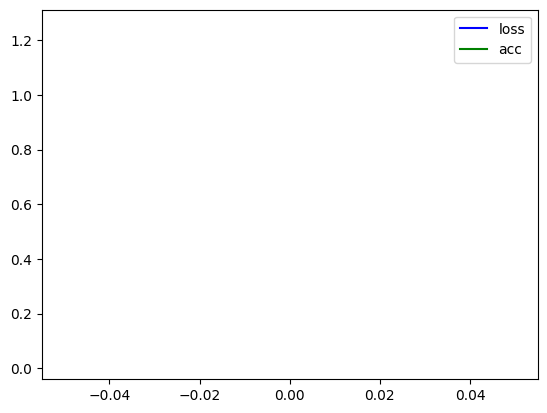

In [40]:
import time
if Use_gpu:
    model = model.cuda()
loss_f = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.fc.parameters(),lr=0.00001)

model_path = None

if model_path:
    epoch_n = 0
else:
    epoch_n = 1
time_open = time.time()
def train_model(net, train_loader, validate_loader, cost, optimezer):
    net.train()       # 训练模式
    now_loss = 1e9    # flag 计算当前最优loss   
    train_ls = []     # 记录在训练集上每个epoch的loss的变化情况
    train_acc = []    # 记录在训练集上每个epoch的准确率的变化情况
    for i in range(epoch_n):
        loss_epoch = 0.    #保存当前epoch的loss和
        correct_epoch = 0  #保存当前epoch的正确个数和
        for j, (data, label) in enumerate(train_loader):
            data, label = data.to(device), label.to(device)
            pre = net(data)
            # 计算当前batch预测正确个数
            correct_epoch += torch.sum(pre.argmax(dim = 1).view(-1) == label.view(-1)).item()
            loss = cost(pre, label)
            loss_epoch += loss.item()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step() 
            if j%100 == 0:
                print(f'batch_loss:{loss.item()}, batch_acc:{torch.sum(pre.argmax(dim = 1).view(-1) == label.view(-1)).item()/len(label)*100}%')
        train_ls.append(loss_epoch/train_size)
        train_acc.append(correct_epoch/train_size)
        
        # 每一个epoch结束后，在验证集上验证实验结果。
        with torch.no_grad():
            loss_validate = 0.
            correct_validate = 0
            for j, (data, label) in enumerate(validate_loader):
                data, label = data.to(device), label.to(device)
                pre = net(data)
                correct_validate += torch.sum(pre.argmax(dim = 1).view(-1) == label.view(-1)).item()
                loss = cost(pre, label)
                loss_validate += loss.item()
           # print(f'validate_sum:{loss_validate},  validate_Acc:{correct_validate}')
            print(f'validate_Loss:{loss_validate/validate_size},  validate_Acc:{correct_validate/validate_size*100}%')
            
            #保存当前最优模型参数
            if now_loss > loss_validate:
                now_loss = loss_validate
                print("保存模型参数。。。。。。。。。。。")
                torch.save(net.state_dict(), 'model.params')
    # 画图
    import numpy as np
    print(len(train_ls))
    plt.plot(np.arange(len(train_ls)), train_ls, color = 'b',label = 'loss')
    plt.plot(np.arange(len(train_acc)), train_acc, color = 'g',label = 'acc')
    plt.legend()
    plt.show()   #显示 lable 
train_model(model, train_loader, validate_loader, loss_f, optimizer)

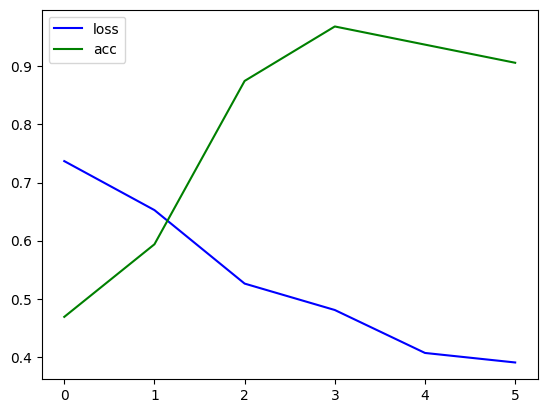

In [15]:
import numpy as np
plt.plot(np.arange(6), [0.7369531, 0.652588, 0.526044, 0.480565, 0.406628, 0.390230], color = 'b',label = 'loss')
plt.plot(np.arange(6), [0.46875, 0.59375, 0.875, 0.96875, 0.9375, 0.90625], color = 'g',label = 'acc')
plt.legend()
plt.show()   #显示 lable 